In [ ]:
!pip install ucimlrepo pandas numpy scikit-learn

In [28]:
# ------- Import Dataset -------------------

from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
X = air_quality.data.features
y = air_quality.data.targets # unused?

# Combine Date and Time into a single DateTime column -> only 14 features
import pandas as pd
import numpy as np

X['DateTime'] = pd.to_datetime(X['Date'] + ' ' + X['Time']) # Format (JJJJ-MM-DD HH:MM:SS, e.g.: 2004-03-10 18:00:00)
X = X.set_index('DateTime')
X.drop(['Date', 'Time'], axis=1, inplace=True)  # Remove the original Date and Time columns
X.replace(-200, 0, inplace=True) #np.nan
X.replace(-200.0, 0, inplace=True)

In [15]:
!pip install prophet plotly

^C


In [56]:
df = X[['CO(GT)']]
df.head()

,CO(GT)
DateTime,
2004-03-10 18:00:00,2.6
2004-03-10 19:00:00,2.0
2004-03-10 20:00:00,2.2
2004-03-10 21:00:00,2.2
2004-03-10 22:00:00,1.6


In [57]:
import pandas as pd

# Reset the index so the date becomes a regular column
df.reset_index(inplace=True)

# Rename the columns to fit Prophet's expected format
df.rename(columns={'DateTime': 'ds', 'CO(GT)': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
df.head()

C:\Users\Tobias\AppData\Local\Temp\ipykernel_32700\717678705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'DateTime': 'ds', 'CO(GT)': 'y'}, inplace=True)
C:\Users\Tobias\AppData\Local\Temp\ipykernel_32700\717678705.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])


,ds,y
0,2004-03-10 18:00:00,2.6
1,2004-03-10 19:00:00,2.0
2,2004-03-10 20:00:00,2.2
3,2004-03-10 21:00:00,2.2
4,2004-03-10 22:00:00,1.6


In [46]:
import pandas as pd
from prophet import Prophet

# Assuming 'df' is your DataFrame
# Ensure 'ds' is in datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Create a Prophet model and fit it
model = Prophet()
model.fit(df)

# Create a future DataFrame for predictions
future = model.make_future_dataframe(periods=14)  # For example, predicting 1 year into the future

# Make predictions
forecast = model.predict(future)
future.tail()
print("abc")
# forecast.tail()

19:29:36 - cmdstanpy - INFO - Chain [1] start processing
19:29:37 - cmdstanpy - INFO - Chain [1] done processing


abc


C:\Users\Tobias\AppData\Roaming\Python\Python310\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Tobias\AppData\Roaming\Python\Python310\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


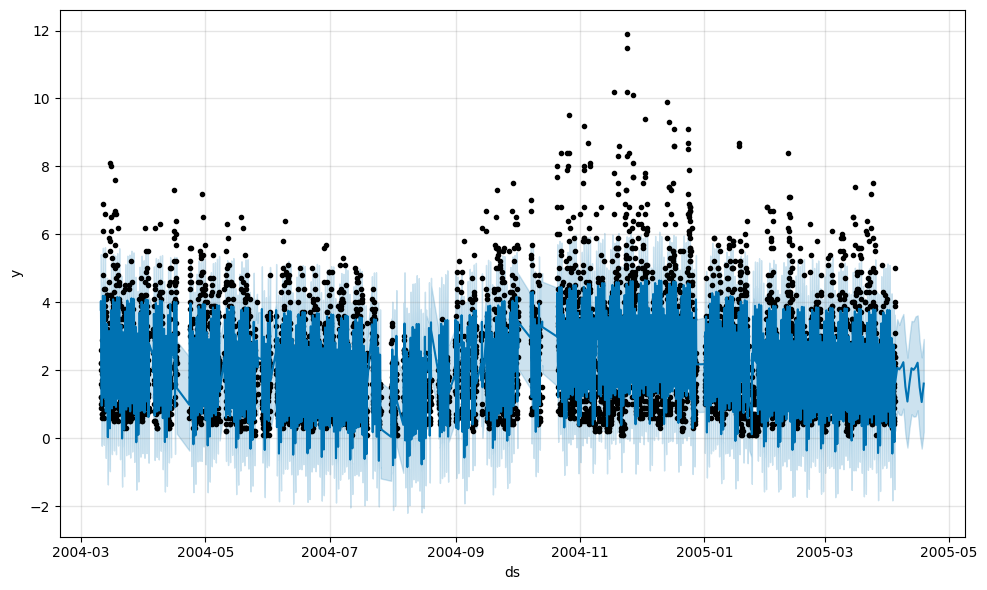

In [58]:
import matplotlib.pyplot as plt
fig1 = model.plot(forecast)
plt.show()  # This is using Matplotlib

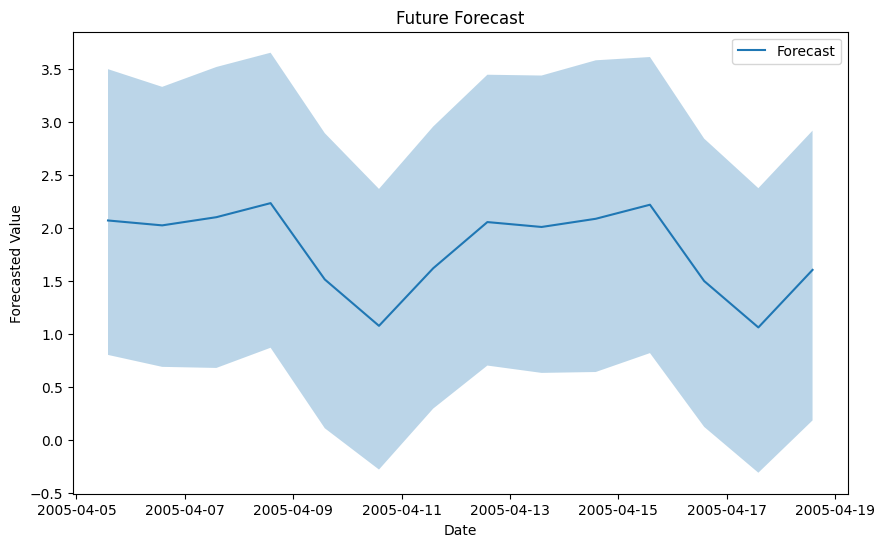

In [59]:
import matplotlib.pyplot as plt
from prophet.plot import add_changepoints_to_plot

# Assuming 'model' is your trained Prophet model
# and 'forecast' is the output from model.predict()

# Find the last date of the historical data
last_hist_date = df['ds'].max()

# Filter the forecast DataFrame to only future dates
future_forecast = forecast[forecast['ds'] > last_hist_date]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Forecast')
plt.fill_between(future_forecast['ds'], future_forecast['yhat_lower'], future_forecast['yhat_upper'], alpha=0.3)  # Optional: add uncertainty intervals
plt.title('Future Forecast')
plt.xlabel('Date')
plt.ylabel('Forecasted Value')
plt.legend()
plt.show()